In [193]:
import pandas as pd

In [194]:
import numpy as np

In [195]:
import os

In [196]:
os.getcwd()

'C:\\Users\\moonk'

### 1번

In [198]:
data = pd.read_csv('example_data.csv')

In [199]:
data

,학번,이름,학년,점수,분반,공부시간
0,1,신사임당,NaN,69,B,4
1,2,홍길동,1.0,92,B,3
2,3,강감찬,4.0,91,C,20
3,4,강감찬,2.0,70,C,5
4,5,강감찬,3.0,83,C,5
5,6,이순신,4.0,95,A,0
6,7,강감찬,4.0,71,C,1
7,8,김유신,NaN,88,B,5
8,9,신사임당,3.0,94,A,9
9,10,홍길동,NaN,60,B,3


In [200]:
data.columns

Index(['학번', '이름', '학년', '점수', '분반', '공부시간'], dtype='object')

### 2번

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학번      21 non-null     int64  
 1   이름      18 non-null     object 
 2   학년      18 non-null     float64
 3   점수      21 non-null     int64  
 4   분반      21 non-null     object 
 5   공부시간    21 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.1+ KB


### 3번

In [204]:
data.describe()

,학번,학년,점수,공부시간
count,21.000000,18.000000,21.000000,21.000000
mean,10.952381,2.777778,90.523810,4.333333
std,6.127611,1.165966,38.647922,5.650959
min,1.000000,1.000000,60.000000,0.000000
25%,6.000000,2.000000,69.000000,1.000000
50%,11.000000,3.000000,83.000000,3.000000
75%,16.000000,4.000000,94.000000,5.000000
max,20.000000,4.000000,200.000000,20.000000


### 4번

In [206]:
data.isna().sum()

학번      0
이름      3
학년      3
점수      0
분반      0
공부시간    0
dtype: int64

### 5번

In [208]:
outlier = (data['점수'] > 100) | (data['공부시간'] > 10)

In [209]:
outlier.sum()

4

In [210]:
data[outlier]

,학번,이름,학년,점수,분반,공부시간
2,3,강감찬,4.0,91,C,20
10,11,NaN,1.0,200,C,0
11,12,신사임당,2.0,96,A,20
18,19,이순신,1.0,200,A,3


### 6번

In [212]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20     True
dtype: bool

In [213]:
data.duplicated(keep=False)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20     True
dtype: bool

In [214]:
data[data.duplicated(keep=False)]

,학번,이름,학년,점수,분반,공부시간
19,20,신사임당,2.0,61,A,2
20,20,신사임당,2.0,61,A,2


### 7번

In [216]:
data.drop_duplicates()

,학번,이름,학년,점수,분반,공부시간
0,1,신사임당,NaN,69,B,4
1,2,홍길동,1.0,92,B,3
2,3,강감찬,4.0,91,C,20
3,4,강감찬,2.0,70,C,5
4,5,강감찬,3.0,83,C,5
5,6,이순신,4.0,95,A,0
6,7,강감찬,4.0,71,C,1
7,8,김유신,NaN,88,B,5
8,9,신사임당,3.0,94,A,9
9,10,홍길동,NaN,60,B,3


In [217]:
data.shape

(21, 6)

### 8번

In [219]:
import matplotlib.pyplot as plt

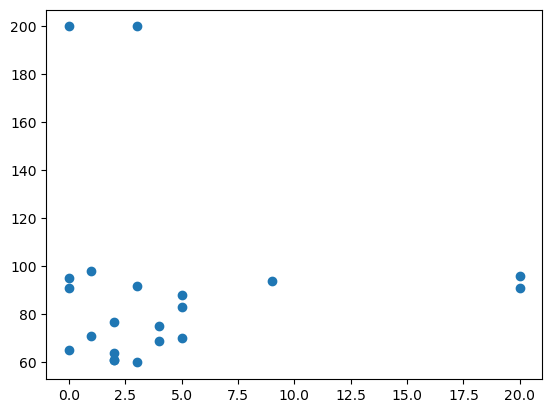

In [220]:
plt.scatter(data['공부시간'], data['점수'])

### 9번

In [222]:
Q1_score = data['점수'].quantile(0.25)
Q3_score = data['점수'].quantile(0.75)
Q1_time = data['공부시간'].quantile(0.25)
Q3_time = data['공부시간'].quantile(0.75)

In [223]:
IQR_score = Q3_score - Q1_score
IQR_time = Q3_time - Q1_time

In [224]:
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score
lower_bound_time = Q1_time - 1.5 * IQR_time
upper_bound_time = Q3_time + 1.5 * IQR_time

In [225]:
outlier_score = (data['점수'] < lower_bound_score) | (data['점수'] > upper_bound_score)
outlier_time = (data['공부시간'] < lower_bound_time) | (data['공부시간'] > upper_bound_time)

In [226]:
data[outlier_score]

,학번,이름,학년,점수,분반,공부시간
10,11,NaN,1.0,200,C,0
18,19,이순신,1.0,200,A,3


In [227]:
data[outlier_time]

,학번,이름,학년,점수,분반,공부시간
2,3,강감찬,4.0,91,C,20
11,12,신사임당,2.0,96,A,20


In [228]:
data = data[(~outlier_score) & (~outlier_time)]

In [229]:
data

,학번,이름,학년,점수,분반,공부시간
0,1,신사임당,NaN,69,B,4
1,2,홍길동,1.0,92,B,3
3,4,강감찬,2.0,70,C,5
4,5,강감찬,3.0,83,C,5
5,6,이순신,4.0,95,A,0
6,7,강감찬,4.0,71,C,1
7,8,김유신,NaN,88,B,5
8,9,신사임당,3.0,94,A,9
9,10,홍길동,NaN,60,B,3
12,13,김유신,4.0,65,A,0


In [230]:
len(data)

17

### 10번

In [232]:
round(data.groupby('분반')['점수'].mean(), 2)

분반
A    75.89
B    77.25
C    80.50
Name: 점수, dtype: float64

### 11번

In [234]:
data.groupby('분반')['점수'].mean().index

Index(['A', 'B', 'C'], dtype='object', name='분반')

In [235]:
data.groupby('분반')['점수'].mean().values

array([75.88888889, 77.25      , 80.5       ])

<BarContainer object of 3 artists>

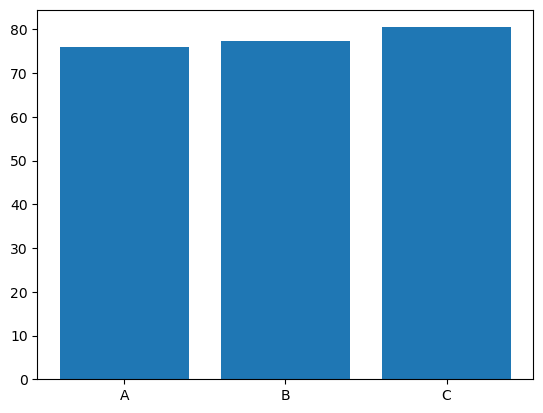

In [236]:
plt.bar(data.groupby('분반')['점수'].mean().index, data.groupby('분반')['점수'].mean().values)

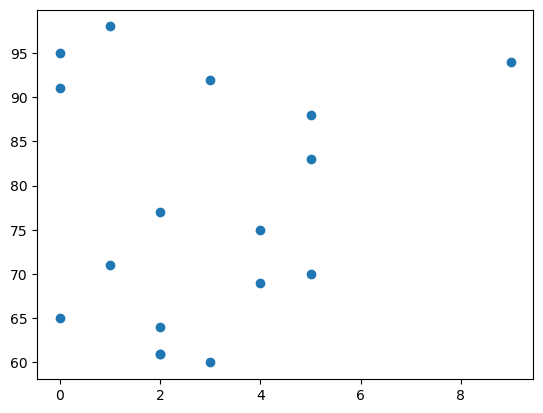

In [237]:
plt.scatter(data['공부시간'], data['점수'])